In [43]:
import pandas
import matplotlib
import matplotlib.pyplot
import datetime
import numpy
import sklearn.linear_model
import sklearn.model_selection

## Part 1: Predicting Hackernews Points With Linear Regression in One Variable
For this part we would like to predict how long a user has to be active
from signing up on Hackernews, to achieve 1000 points. In this experiment our input variable is
time and our output variable is points. X (time) and Y (points).

### Part 1.1: Data preprocessing

In [44]:
dataframe = pandas.read_json('./users.json')
dataframe.head(3)

,about,created,error,id,karma,submitted
0,NaN,1.510266e+09,NaN,gcgggfxsdg,-1.0,5
1,"Ruby, Open Source, Devops",1.325548e+09,NaN,sheerun,102.0,51
2,NaN,1.459331e+09,NaN,keypress,79.0,70


In [45]:
dataframe = dataframe[dataframe['created'].notnull()]
dataframe = dataframe[dataframe['karma'].notnull()]

In [46]:
import datetime
now = datetime.datetime.now()

def get_days_of_service(created):
    try:
        created_timestamp = int(created)
        created_date = datetime.datetime.fromtimestamp(created_timestamp)
        return (now - created_date).days
    except ValueError:
        print("Not an integer")

dataframe["days since created"] = dataframe.apply(
    lambda row: get_days_of_service(row["created"]), axis=1
)

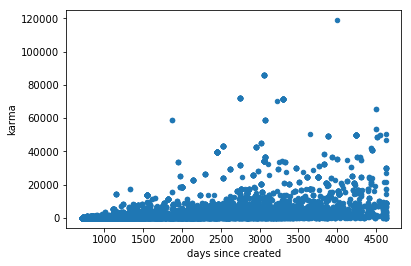

In [47]:
%matplotlib inline
dataframe.plot.scatter(x="days since created", y="karma")

### Part 1.2: Model selection
Our task was to predict continous outcome of how long it takes a user to gather 1000 points on HackerNews. This means it is not a classification task. We'll select liniear regression model. A regression deals with when things continue to develop in some direction. They can be mutually developed (correlation).
Our X and Y will be time on the X axis and points (karma) on the Y axis, as the graph above shows. It should be possible to predict how long time it'll take to get the desired 1000 points.

### Part 1.3: Model training

In [48]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [49]:
X = dataframe[['days since created']]
Y = dataframe['karma']
x = dataframe['days since created']

In [50]:
# the following will not work!
#linear_model.fit(dataframe['created'], dataframe['karma'])

#this works
#linear_model.fit(numpy.array(x).reshape(-1,1), dataframe['karma'])
# this will also works
linear_model.fit(X, Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
linear_model.coef_

array([3.18376117])

In [52]:
linear_model.intercept_

-2974.549848521314

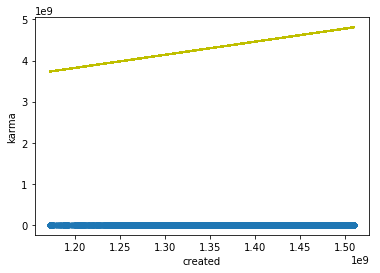

In [53]:
import matplotlib.pyplot as plt
import numpy as np

x = dataframe["created"]
predicted = linear_model.predict(np.array(x).reshape(-1, 1))
dataframe.plot.scatter(x="created", y="karma")
plt.plot(x, predicted, "y")

### Part 1.4: Model Validation

### 1.4.1 A description of the model parameters

The model is described by following equation:

    f(x) = ax + b
    
*a* (coefficient) defines the slobe of the line. If *a* is positive the line is rising, and if *a* is negative the slobe is falling.

*b* (intercept) defines the point where the line is crossing the y axis.

### 1.4.2 A visual plot of the model that explains the description above.

a (coefficient)

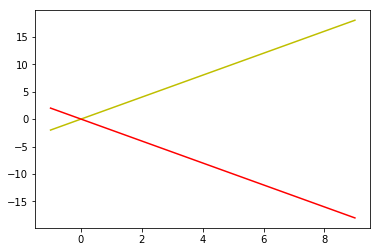

In [54]:
ex_range = np.arange(-1,10)

plt.plot(ex_range, 2 * ex_range, "y")
plt.plot(ex_range, -2 * ex_range, "r")

*b* (intercept)

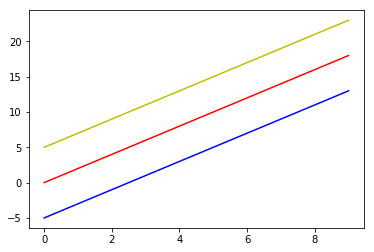

In [55]:
ex_range = np.arange(0,10)

plt.plot(ex_range, 2 * ex_range + 5, "y")
plt.plot(ex_range, 2 * ex_range, "r")
plt.plot(ex_range, 2 * ex_range - 5, "b")


1.4.3 Explain: What does it take to get 1000 points? How long would you have to be active on Hackernews?_


By isolation of x in the linear equation we get the calculation needed to answer this question

y = ax + b

x = (y - b) / a

In [56]:
def days_before_points(karma_points):
    return (karma_points - linear_model.intercept_)/linear_model.coef_

days_before_points(1000)

array([1248.3819081])

So the answer is that it takes roughly the above specified value marks the number of days to get 1000 karma points.


1.4.4. Explain: how you have **sanity checked** your resulting trained/validated model: What does it take to get 1000 points? 500 points? 10000 points? 100 points? How long would you have to be active on Hackernews in those cases?_

In [57]:
one_thousand = days_before_points(1000)
five_hundred = days_before_points(500)
ten_thousand = days_before_points(10000)
one_hundred = days_before_points(100)

In [58]:
one_thousand

array([1248.3819081])

In [59]:
five_hundred

array([1091.33495238])

In [60]:
ten_thousand

array([4075.22711097])

In [61]:
one_hundred

array([965.69738781])

## Part 2: Predicting Hackernews Points With _Multivariate_ Linear Regression

### Data preprocessing

In [62]:
dataframe = dataframe[dataframe["submitted"].notnull()]

### Model training

In [63]:
from sklearn.linear_model import LinearRegression
multiple_model = LinearRegression()

In [64]:
xs = dataframe[["days since created", "submitted"]]

multiple_model.fit(xs, dataframe["karma"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
predicted = multiple_model.predict(xs)
predicted

array([-475.59955943,  884.49097044,   38.90046428, ..., 4810.19870628,
        776.76670474, -289.33731555])

In [66]:
multiple_model.coef_

array([0.57890444, 2.66071392])

In [67]:
multiple_model.intercept_

-901.0830892122722

### A description of the parameters

y = ax_1 +bx_2 +c

*y* is the dependant variable meaning the value that we want to predict

*x_1* is the first explanatory variable which in our case represents the  amount of days that the user have been active

*x_2* is the second explanatory variable which represents the number of posts submitted by the user

*a* is the coefficient of *x_1*. *a* acts as a weight factor of how influential *x_1* is. The further away *a* is from zero the bigger an influence *x_1* have on the result.

*b* is the coefficient related to *x_2* influence *x_2* in the same way as *a* influences *x_1*

### An analysis of how much time you need to be active on Hackernews, plus how many posts you need to reach 1000 points.

Gaining 1000 points on the hacker news platform can statistically be achieved by adjusting the x_1 and x_2 variables. Since we want to achieve 1000 points we can isolate either of the x variables in order to express their relation with an equation. Below we have isolated x_1.

y = ax_1 +bx_2 +c


x_1 = (y -bx_2 -c)/a


We can now plot this equation from a range of given x_2 values in order to visualise their relationship.

In [68]:
y = 1000
a = multiple_model.coef_[0]
b = multiple_model.coef_[1]
c = multiple_model.intercept_

In [69]:
def x_1_isolated(x_2):
    return (y -(b * x_2) -c)/a

In [70]:
ex_x_range = np.arange(0,700)

In [71]:
ex_y_range = [x_1_isolated(val) for val in list(ex_x_range)]

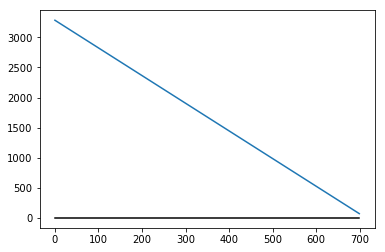

In [72]:
plt.plot(ex_x_range, ex_y_range)
plt.plot(ex_x_range, [0 for val in list(ex_x_range)], "k")

The above visualized function takes in any given number of user posts and allows us to calculate how long a user should be active in order to achieve 1000 karma points.

### Explain: how much does the number of posts contribute to get the points? How much do the time since registration explain?

In [73]:
#The number of posts contributes this much to get the karma points:

b

2.66071392355696

In [74]:
#The time since registration contributes this much to get the karma points:
a

0.5789044384392117

In [75]:
%reset -f


## Part 3: Prediction of breast cancer malignity

In [76]:
import numpy as np
import pandas as pd  # for matrix and array operation
from sklearn.metrics import accuracy_score # Find accuracy score from dataset
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder # Convert catagorical to numarical featere
from sklearn.model_selection import train_test_split #traing testing dataset convert split

In [77]:
### Part 3.1: Looking at the data
data = "data.csv"
dataset =pd.read_csv(data)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
###  How big is your dataset?  
dataset.shape

(569, 33)

The most notable feature is the classification field (Diagnosis) which give information either the patent cancer is benign or malign.

In [79]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [80]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Part 3.2: Building the model


#### Data Processing

In [81]:
le = LabelEncoder()
dataset['diagnosis'] = le.fit_transform(dataset['diagnosis'])
Y = dataset.diagnosis
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [82]:
X = dataset.drop(['diagnosis', 'id', 'Unnamed: 32'], axis =1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
def splitting(X,Y):
    return train_test_split(X,Y, test_size = 0.30, random_state =42)

X_train, X_test, Y_train, Y_test = splitting(X,Y)

In [84]:
X_train.shape

(398, 30)

In [85]:
X_test.shape

(171, 30)

### Part 3.3 Evaluating the model 

#### Training the model

In [86]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [87]:
log_reg  = LogisticRegression();

In [88]:
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### How well does the model fit?

In [89]:
Y_pred = log_reg.predict(X_test)

In [90]:
# the accuracy of the score 
accuracy = accuracy_score(Y_test,Y_pred)

In [91]:
accuracy = accuracy_score

In [98]:
accuracy

<function sklearn.metrics.classification.accuracy_score>

####  five lines describing what that number of accuracy actually means.

accuracy tell us how good our model prediction is.

### Is our dataset 'balanced'?

In [99]:
dataset.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Should we use ROC curve-based or perhaps a precision-recall optimization be used here?

 #### Our dataset is unbalance therefore we can not use ROC but to resolve to a precision-recall

In [100]:
# need to find threshold valu use sigmoid function.

In [101]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, Y_pred)
cm

array([[106,   2],
       [  4,  59]])

In [106]:
import matplotlib.pyplot as plt
def display_confusion(confmat):
    
    fig, ax = plt.subplots(figsize=(9.8, 9.8))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')

            plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()


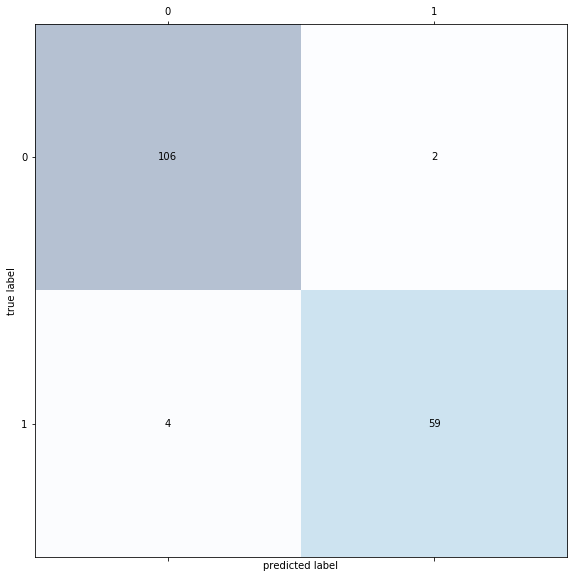

In [107]:
display_confusion(cm)

In [104]:
accuracy =  165/171 #106+60/106+60+3+2

In [105]:
accuracy

0.9649122807017544

#### What can the number tell you when you inform patiens whether their cancer is benign or malign?
We can say that our result is built on a statistical model. We do not know for sure that our result is correct but according to our numbers there are a 96% that our model is correct.